`~별로 -> 범주형 ->  hue 파라미터 사용하라는 뜻`

- **문제 1**: `교육 수준 별로` 나이와 임금의 관계를 탐색하기 위한 시각화를 구현하고, 시각화 결과에서 알 수 있는 사
실을 설명하세요. 

- **문제 2**: `인종(race)별로` 직업군(jobclass)에 따른 임금(wage) 분포를 비교할 수 있는 시각화를 구현하고, 시각
화 결과에서 알 수 있는 사실을 설명하세요. 

- **문제 3**: 연도(year)에 따른 임금(wage)의 변화 추이를 `교육 수준(education)별로` 나누어 시각화하고, 시각화
결과에서 알 수 있는 사실을 설명하세요.

### **문제 1**: `교육 수준 별로` 나이와 임금의 관계를 탐색하기 위한 시각화를 구현하고, 시각화 결과에서 알 수 있는 사실을 설명하세요. 

-> 나이와 임금 모두 수치형 -> lm plot이 적합해 보인다

In [1]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb

In [2]:
my_dpi = 200  # 이미지 선명도 (100~300)
font_path = r"\Users\itwill\OneDrive\문서\학원수업\NotoSansKR-Regular.ttf"  # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)      # 폰트 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname = font_path)    # 폰트 속성을 읽어옴
font_name = font_prop.get_name()    # 읽어온 속성에서 폰트의 이름만 추출

plt.rcParams['font.family'] = font_name # 그래프에 한글폰트 적용
plt.rcParams['font.size'] = 6          # 기본 폰트 크기
plt.rcParams['axes.unicode_minus'] = False  
    # 그래프에 마이너스 깨짐 방지 (한글 환경에선 필수)

In [3]:
origin = load_data('wage')
origin.info()

[data] https://data.hossam.kr/data/lab06/wage.xlsx
[desc] Wage 데이터 셋은 경제 및 노동 시장에 관련된 정보를 담고 있는 데이터셋(출처: ADsP 기출문제)

field       description
----------  ------------------
year        년도
age         나이
maritl      결혼여부
race        근로자의 인종
education   교육수준
region      지역
jobclass    직군
health      건상상태
health_ins  건강보험 가입 여부
logwage     임금(로그값)
wage        임금

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        3000 non-null   int64  
 1   age         3000 non-null   int64  
 2   maritl      3000 non-null   object 
 3   race        3000 non-null   object 
 4   education   3000 non-null   object 
 5   region      3000 non-null   object 
 6   jobclass    3000 non-null   object 
 7   health      3000 non-null   object 
 8   health_ins  3000 non-null   object 
 9   logwage     3000 non-null   float64
 10  wage        3000 non-null   float6

In [ ]:
# 데이터 전처리: object -> catrgory
df1 = origin.astype(
    {
        'education': 'category'
    }
)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        3000 non-null   int64   
 1   age         3000 non-null   int64   
 2   maritl      3000 non-null   object  
 3   race        3000 non-null   object  
 4   education   3000 non-null   category
 5   region      3000 non-null   object  
 6   jobclass    3000 non-null   object  
 7   health      3000 non-null   object  
 8   health_ins  3000 non-null   object  
 9   logwage     3000 non-null   float64 
 10  wage        3000 non-null   float64 
dtypes: category(1), float64(2), int64(2), object(6)
memory usage: 237.6+ KB


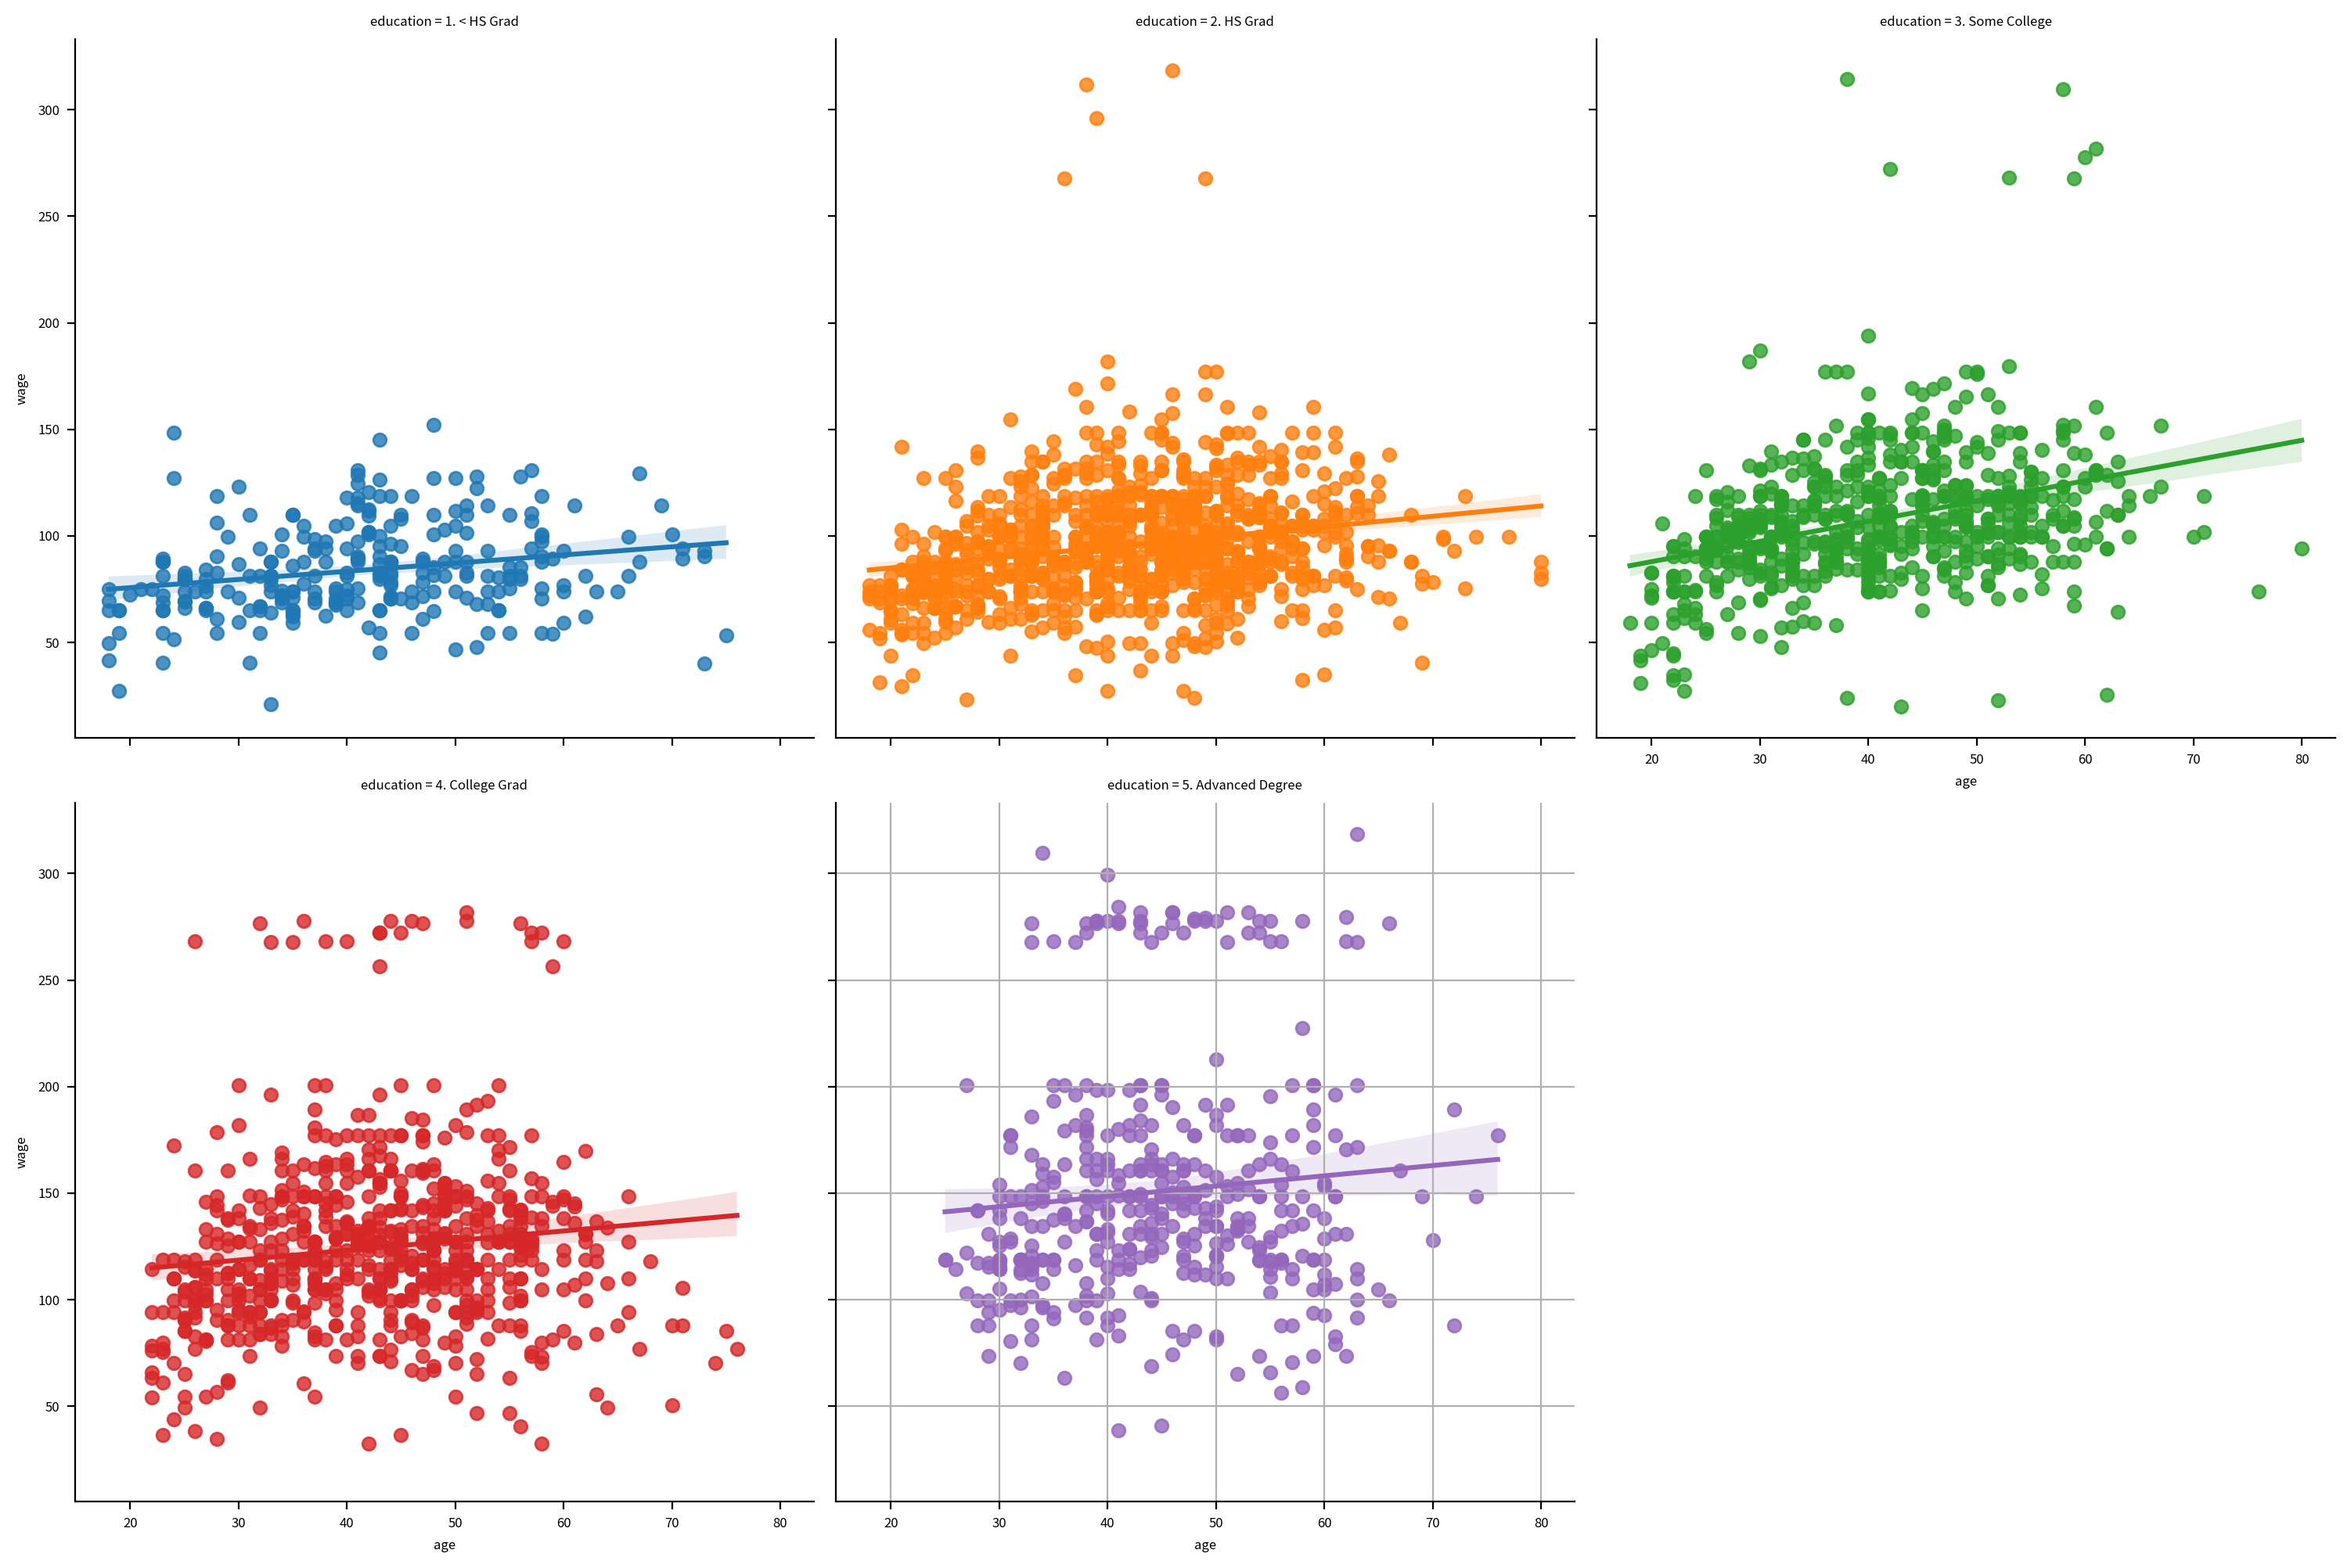

In [5]:
# 1) 그래프 초기화
width_px = 3000             # 그래프 가로 크기
height_px = 2000             # 그래프 세로 크기
figsize = (width_px / my_dpi, height_px / my_dpi)

# 2) Lm Plot 그래프 그리기
# (한 그래프로 다 보고싶을 때:
#g = sb.lmplot(data=df1, hue='education', x='age', y='wage')
# )
g = sb.lmplot(
    data = df1, hue = 'education', x = 'age', y = 'wage',
    col = 'education', col_wrap = 3)
g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figheight(figsize[1])
plt.grid()

# 4) 출력
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

알 수 있는 사실:

- 전반적으로 나이가 많아질수록 임금이 상승하는 경향성이 있다.
- 교육 수준이 높을수록 임금이 더 높은 경향을 보인다.

### **문제 2**: `인종(race)별로` 직업군(jobclass)에 따른 임금(wage) 분포를 비교할 수 있는 시각화를 구현하고, 시각화 결과에서 알 수 있는 사실을 설명하세요. 

- 이때, 직업군은 범주형 -> 그래프 선택: 바이올린 plot이 적합

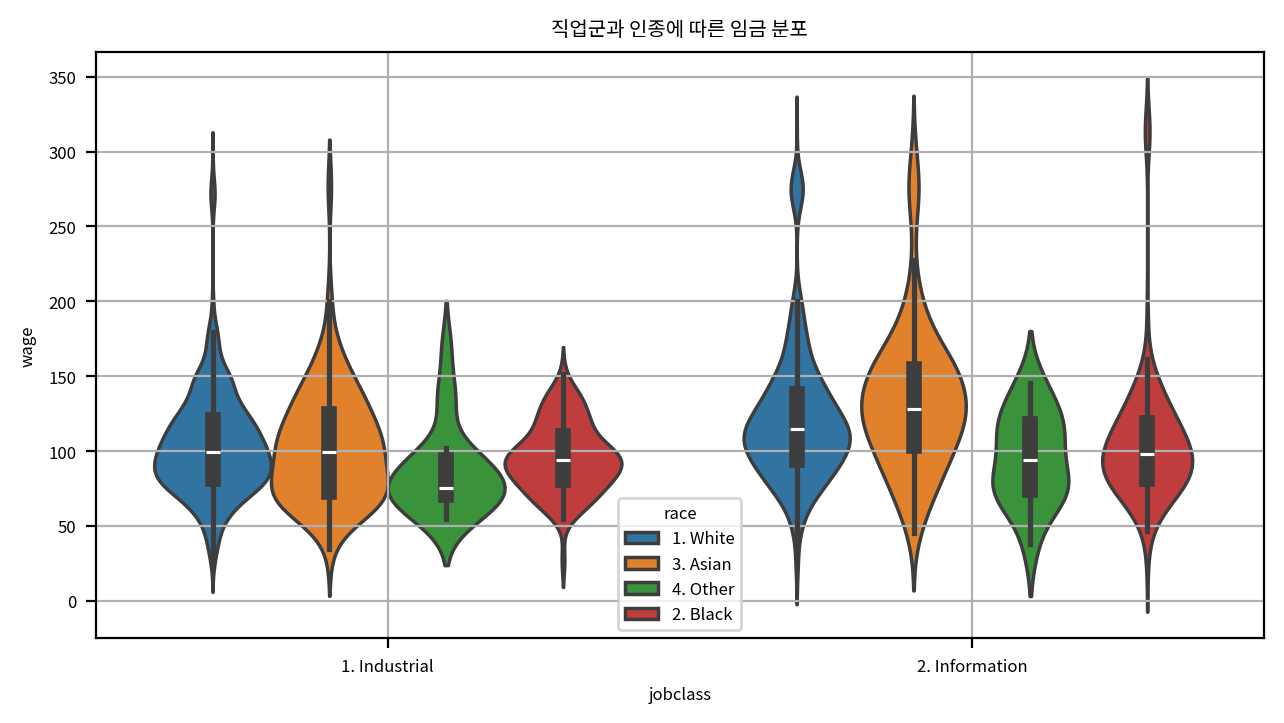

In [6]:
# 1) 그래프 초기화
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) violin plot 그래프 그리기
sb.violinplot(data = df1, hue = 'race', 
              x = 'jobclass', y = 'wage')

# 3) 그래프 꾸미기: 
ax.set_title("직업군과 인종에 따른 임금 분포")
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()           # 여백 제거
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료

알 수 있는 사실:
- 같은 인종 끼리 비교했을 때, 모든 인종에서 사무직이 생산직보다 임금 중앙값이 높에 나타난다.
- 두 직군 모두에서 'White'랑 'Asian' 인종이 'Black'이나 'Others' 인종보다 높은 임금 분포를 보인다.
- 'Asian' 인종은 'Information' 직군에서 특히 높은 임금 (200 이상)을 받는 비중이 다른 인종에 비해 두드러진다.
- 'Black' 인종은 두 직군 모두에서 임금 분포가 비교적 낮은 쪽에 집중되어 있다. 

### **문제 3**: 연도(`year`)에 따른 임금(`wage`)의 변화 추이를 `교육 수준(education)별로` 나누어 시각화하고, 시각화
결과에서 알 수 있는 사실을 설명하세요.

- hue = education
- 년도랑 임금 둘다 수치형
- ~에 따른: 연도 -> x = year, y = wage
  - => 선그래프 (시계열)

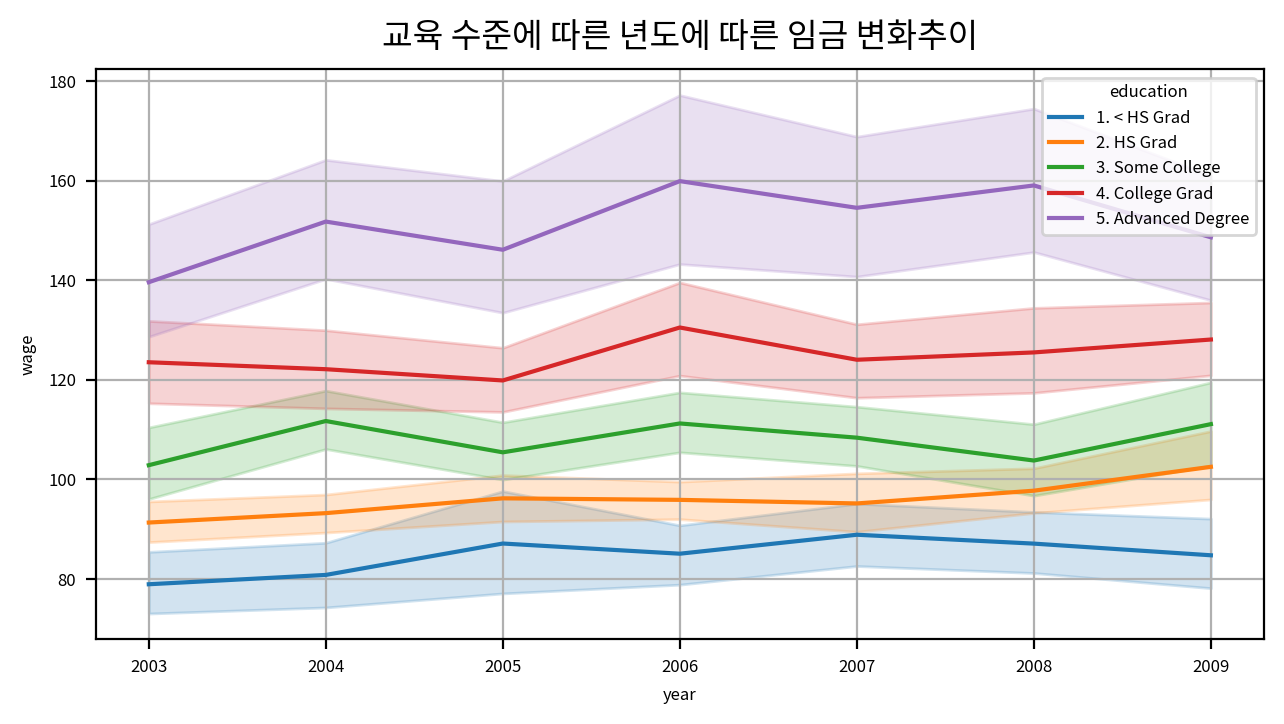

In [8]:
# 1) 그래프 초기화
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) lineplot 그래프 그리기
sb.lineplot(data = df1, 
            x = 'year', y = 'wage', hue = 'education')

# 3) 그래프 꾸미기: 
ax.set_title(
    "교육 수준에 따른 년도에 따른 임금 변화추이", 
    pad = 8, fontsize = 12)
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()           # 여백 제거
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료

알 수 있는 사실:
- 교육 수준이 높을수록 임금 수준이 높에 나타나는 서열이 뚜렷하다
  - Advanecd Degree > College Grad > Some College > HS grad > under HS Grad
- 대학원졸업 집단의 경우, 임금이 다른 집단에 비해 구별 될 정도로 높고 연도에 따른 임금 상승률도 제일 뚜렷하다. 한 가지 짚어보아야 할 것은, 2008년까지는 대체로 상승하다가 2009년도에 하락하는 모습을 보여주는데, 이는 2008년 금융위기의 영향인 것으로 보여진다. 
- 고등학교 미만 집단은 다른 집단에 비해 임금 수준이 제일 낮고 연도에 따른 임금 변화도 거의 없다. 